For the 3 Sex Classification models (CheXpert-trained, MIMIC-trained, NIH-trained), model performance (wAUC [95%CI]) is plotted per test dataset. CheXpert model performance is blue, MIMIC model performance is green and NIH model performance is red. The test sets are considered as a whole, and then stratified by the age of 12.

# Peds Sex Performance Full

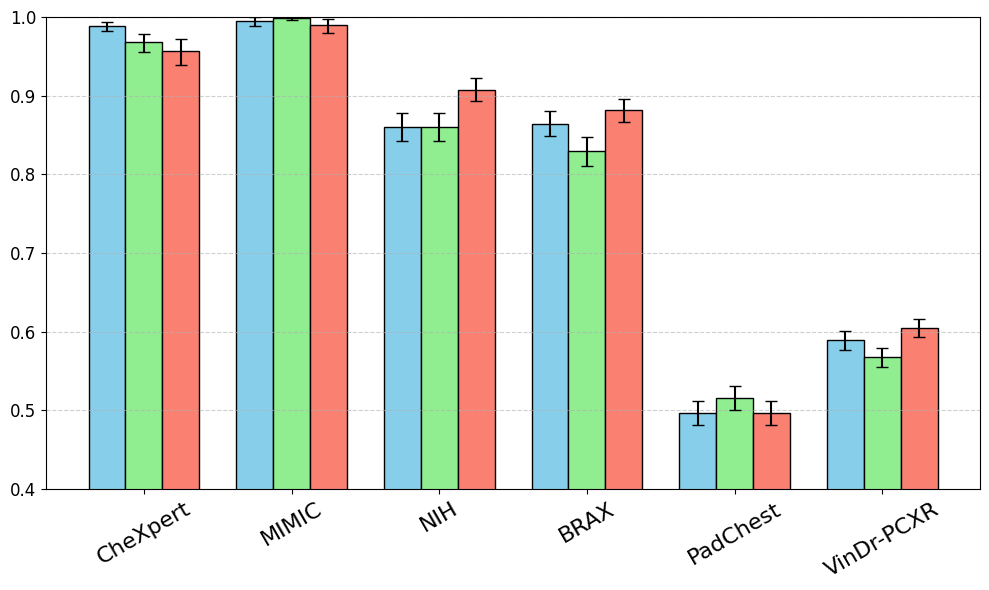

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
data = [
    ("CheXpert", "BRAX", 0.8646, [0.8485, 0.8803]),
    ("CheXpert", "CheXpert", 0.9887, [0.9821, 0.9936]),
    ("CheXpert", "MIMIC", 0.9950, [0.9882, 0.9994]),
    ("CheXpert", "NIH", 0.8598, [0.8418, 0.8774]),
    ("CheXpert", "PadChest", 0.4972, [0.4818, 0.5122]),
    ("CheXpert", "VinDr-PCXR", 0.5892, [0.5767, 0.6006]),

    ("MIMIC", "BRAX", 0.8291, [0.8112, 0.8469]),
    ("MIMIC", "CheXpert", 0.9685, [0.9559, 0.9788]),
    ("MIMIC", "MIMIC", 0.9987, [0.9962, 1.0000]),
    ("MIMIC", "NIH", 0.8601, [0.8422, 0.8779]),
    ("MIMIC", "PadChest", 0.5158, [0.5011, 0.5310]),
    ("MIMIC", "VinDr-PCXR", 0.5675, [0.5549, 0.5789]),

    ("NIH", "BRAX", 0.8823, [0.8669, 0.8957]),
    ("NIH", "CheXpert", 0.9573, [0.9384, 0.9722]),
    ("NIH", "MIMIC", 0.9894, [0.9800, 0.9972]),
    ("NIH", "NIH", 0.9072, [0.8932, 0.9220]),
    ("NIH", "PadChest", 0.4962, [0.4809, 0.5115]),
    ("NIH", "VinDr-PCXR", 0.6049, [0.5933, 0.6158]),
]

from matplotlib.font_manager import FontProperties

bold_font = FontProperties(weight='bold')
# Extract unique test sets and training sets
test_sets = test_sets = [
    "CheXpert", "MIMIC", "NIH",
    "BRAX", "PadChest", "VinDr-PCXR"
]
train_sets = sorted(set(d[0] for d in data))
colors = {'CheXpert': 'skyblue', 'MIMIC': 'lightgreen', 'NIH': 'salmon'}

# Plot parameters
bar_width = 0.25
x = np.arange(len(test_sets))
test_index = {test: i for i, test in enumerate(test_sets)}

# Initialize plot with smaller width
fig, ax = plt.subplots(figsize=(10, 6))  # reduced width

# Plot grouped bars
for i, train in enumerate(train_sets):
    means, lower_err, upper_err, positions = [], [], [], []

    for test in test_sets:
        match = next((d for d in data if d[0] == train and d[1] == test), None)
        if match:
            mean = match[2]
            ci = match[3]
            means.append(mean)
            lower_err.append(mean - ci[0])
            upper_err.append(ci[1] - mean)
        else:
            means.append(np.nan)
            lower_err.append(0)
            upper_err.append(0)
        positions.append(test_index[test] + i * bar_width - bar_width)

    ax.bar(positions, means, width=bar_width, label=train,
           yerr=[lower_err, upper_err], capsize=4,
           color=colors[train], edgecolor='black')

# Improve x-axis label appearance
ax.set_xticks(np.arange(len(test_sets)))
ax.set_xticklabels(test_sets, rotation=30, ha='center', fontsize=16)  # increased fontsize
yticks = np.arange(0.4, 1.05, 0.1)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{x:.1f}' for x in yticks], fontsize=12)

# Labels & title
#ax.set_ylabel("Weighted ROC-AUC", fontsize=12)
#ax.set_title("Weighted ROC-AUC by Test Set\nGrouped by Test Set and Colored by Training Set", fontsize=14)
#ax.legend(title="Training Data", title_fontproperties=bold_font)
plt.ylim(0.4, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

# Peds Sex Performance < 12

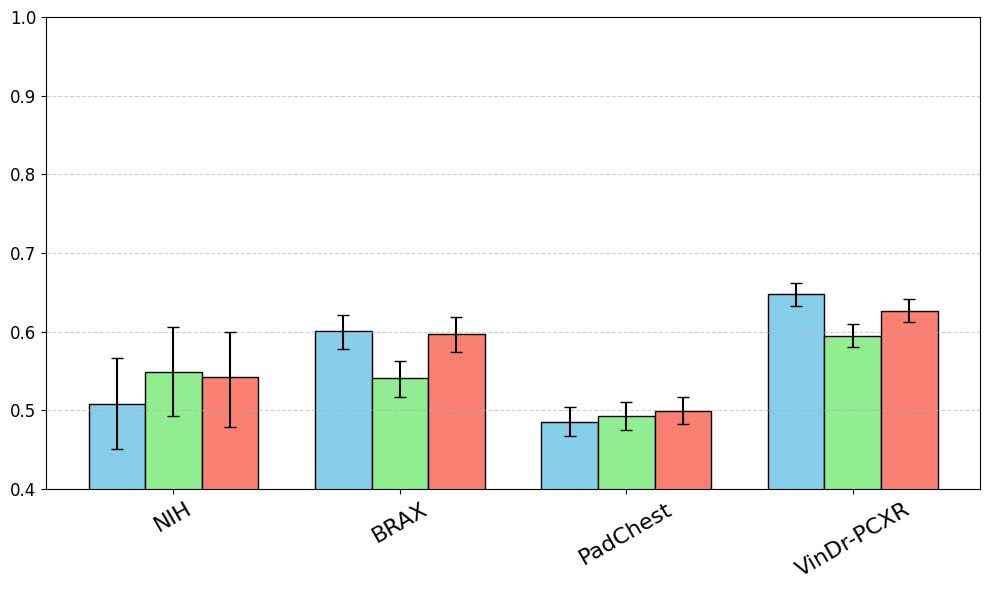

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
data = [
    ("CheXpert", "BRAX", 0.6003, [0.5785, 0.6213]),
    ("CheXpert", "NIH", 0.5081, [0.4507, 0.5661]),
    ("CheXpert", "PadChest", 0.4850, [0.4671, 0.5039]),
    ("CheXpert", "VinDr-PCXR", 0.6478, [0.6326, 0.6624]),

    ("MIMIC", "BRAX", 0.5411, [0.5175, 0.5631]),
    ("MIMIC", "NIH", 0.5491, [0.4929, 0.6060]),
    ("MIMIC", "PadChest", 0.4930, [0.4756, 0.5105]),
    ("MIMIC", "VinDr-PCXR", 0.5946, [0.5802, 0.6101]),

    ("NIH", "BRAX", 0.5966, [0.5738, 0.6188]),
    ("NIH", "NIH", 0.5420, [0.4792, 0.5997]),
    ("NIH", "PadChest", 0.4997, [0.4821, 0.5173]),
    ("NIH", "VinDr-PCXR", 0.6264, [0.6118, 0.6413]),
]

from matplotlib.font_manager import FontProperties

bold_font = FontProperties(weight='bold')
# Extract unique test sets and training sets
test_sets = test_sets = [
    "NIH",
    "BRAX", "PadChest", "VinDr-PCXR"
]
train_sets = sorted(set(d[0] for d in data))
colors = {'CheXpert': 'skyblue', 'MIMIC': 'lightgreen', 'NIH': 'salmon'}

# Plot parameters
bar_width = 0.25
x = np.arange(len(test_sets))
test_index = {test: i for i, test in enumerate(test_sets)}

# Initialize plot with smaller width
fig, ax = plt.subplots(figsize=(10, 6))  # reduced width

# Plot grouped bars
for i, train in enumerate(train_sets):
    means, lower_err, upper_err, positions = [], [], [], []

    for test in test_sets:
        match = next((d for d in data if d[0] == train and d[1] == test), None)
        if match:
            mean = match[2]
            ci = match[3]
            means.append(mean)
            lower_err.append(mean - ci[0])
            upper_err.append(ci[1] - mean)
        else:
            means.append(np.nan)
            lower_err.append(0)
            upper_err.append(0)
        positions.append(test_index[test] + i * bar_width - bar_width)

    ax.bar(positions, means, width=bar_width, label=train,
           yerr=[lower_err, upper_err], capsize=4,
           color=colors[train], edgecolor='black')

# Improve x-axis label appearance
ax.set_xticks(np.arange(len(test_sets)))
ax.set_xticklabels(test_sets, rotation=30, ha='center', fontsize=16)  # increased fontsize
yticks = np.arange(0.4, 1.05, 0.1)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{x:.1f}' for x in yticks], fontsize=12)

# Labels & title
#ax.set_ylabel("Weighted ROC-AUC", fontsize=12)
#ax.set_title("Weighted ROC-AUC by Test Set\nGrouped by Test Set and Colored by Training Set", fontsize=14)
#ax.legend(title="Training Data", title_fontproperties=bold_font)
plt.ylim(0.4, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

# Peds Sex Performance >= 12

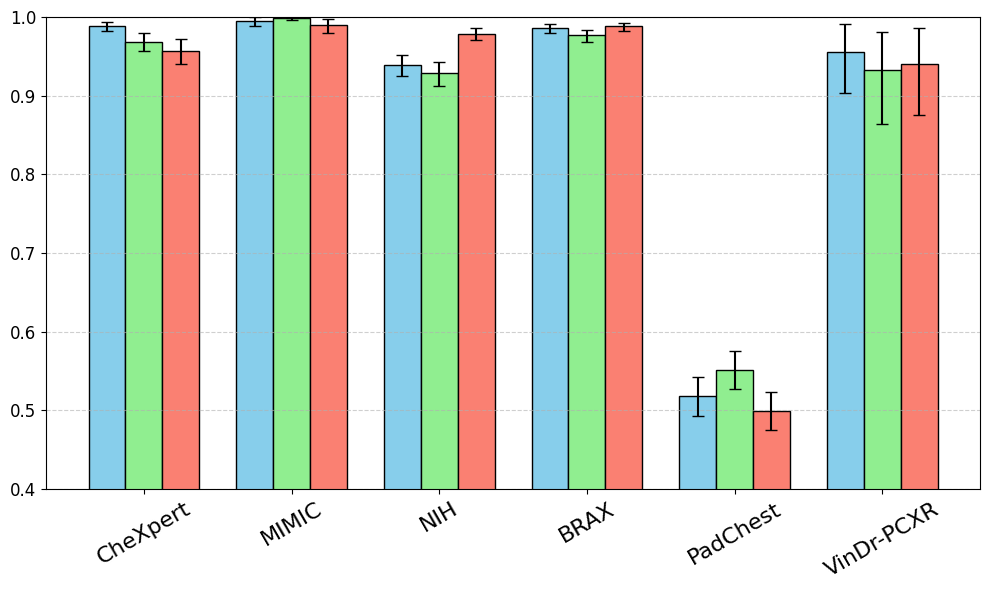

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
data = [
    ("CheXpert", "BRAX", 0.9860, [0.9797, 0.9912]),
    ("CheXpert", "CheXpert", 0.9887, [0.9825, 0.9940]),
    ("CheXpert", "MIMIC", 0.9950, [0.9883, 0.9995]),
    ("CheXpert", "NIH", 0.9393, [0.9252, 0.9523]),
    ("CheXpert", "PadChest", 0.5182, [0.4929, 0.5425]),
    ("CheXpert", "VinDr-PCXR", 0.9556, [0.9033, 0.9907]),

    ("MIMIC", "BRAX", 0.9770, [0.9688, 0.9840]),
    ("MIMIC", "CheXpert", 0.9685, [0.9566, 0.9796]),
    ("MIMIC", "MIMIC", 0.9987, [0.9964, 1.0000]),
    ("MIMIC", "NIH", 0.9286, [0.9123, 0.9434]),
    ("MIMIC", "PadChest", 0.5518, [0.5278, 0.5759]),
    ("MIMIC", "VinDr-PCXR", 0.9323, [0.8636, 0.9808]),

    ("NIH", "BRAX", 0.9881, [0.9825, 0.9928]),
    ("NIH", "CheXpert", 0.9573, [0.9398, 0.9723]),
    ("NIH", "MIMIC", 0.9894, [0.9801, 0.9973]),
    ("NIH", "NIH", 0.9788, [0.9714, 0.9856]),
    ("NIH", "PadChest", 0.4987, [0.4745, 0.5240]),
    ("NIH", "VinDr-PCXR", 0.9404, [0.8750, 0.9857]),
]

from matplotlib.font_manager import FontProperties

bold_font = FontProperties(weight='bold')
# Extract unique test sets and training sets
test_sets = test_sets = [
    "CheXpert", "MIMIC", "NIH",
    "BRAX", "PadChest", "VinDr-PCXR"
]
train_sets = sorted(set(d[0] for d in data))
colors = {'CheXpert': 'skyblue', 'MIMIC': 'lightgreen', 'NIH': 'salmon'}

# Plot parameters
bar_width = 0.25
x = np.arange(len(test_sets))
test_index = {test: i for i, test in enumerate(test_sets)}

# Initialize plot with smaller width
fig, ax = plt.subplots(figsize=(10, 6))  # reduced width

# Plot grouped bars
for i, train in enumerate(train_sets):
    means, lower_err, upper_err, positions = [], [], [], []

    for test in test_sets:
        match = next((d for d in data if d[0] == train and d[1] == test), None)
        if match:
            mean = match[2]
            ci = match[3]
            means.append(mean)
            lower_err.append(mean - ci[0])
            upper_err.append(ci[1] - mean)
        else:
            means.append(np.nan)
            lower_err.append(0)
            upper_err.append(0)
        positions.append(test_index[test] + i * bar_width - bar_width)

    ax.bar(positions, means, width=bar_width, label=train,
           yerr=[lower_err, upper_err], capsize=4,
           color=colors[train], edgecolor='black')

# Improve x-axis label appearance
ax.set_xticks(np.arange(len(test_sets)))
ax.set_xticklabels(test_sets, rotation=30, ha='center', fontsize=16)  # increased fontsize
yticks = np.arange(0.4, 1.05, 0.1)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{x:.1f}' for x in yticks], fontsize=12)

# Labels & title
#ax.set_ylabel("Weighted ROC-AUC", fontsize=12)
#ax.set_title("Weighted ROC-AUC by Test Set\nGrouped by Test Set and Colored by Training Set", fontsize=14)
#ax.legend(title="Training Data", title_fontproperties=bold_font)
plt.ylim(0.4, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()